# Подготовка стратегии по снжению оттока клиентов фитнес-центра

**Описание исследования:**  
Сеть фитнес-центров «Культурист-датасаентист» хочет разработать стратегию взаимодействия с пользователями на основе аналитических данных. В электронный вид переведны анкеты и данные контрактов пользователей.

**Цель исследования:**  
Необходимо провести анализ данных, разработать методику  определения клиентов планирующих завершить пользоваться услугами фитнес-центра и подготовить рекомендации для стратегии взаимодействия с пользователями и их удержания для того, чтобы фитнес-центр мог снизить отток клиентов.

**Задачи исследования:**  
Для того, чтобы разработать методику определения клиентов планирующих завершить пользоваться услугами фитнес-центра и подготовить рекомендации для стратегии взаимодействия с пользователями и их удержания мы  
- загрузим данные;
- проведенм их обработку и анализ;
- построим модели прогнозирования оттока пользователей;
- разделим пользователей на группы для подготовки персональных предложений.

**Исходные данные:**
- `Churn` — факт оттока в текущем месяце; 
- Данные пользователя за предыдущий до проверки факта оттока месяц: 
    - `gender` — пол
    -  `Near_Location ` — проживание или работа в районе, где m
    -  `Partner ` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент  и в таком случае фитнес-центр хранит информацию о работодателе клиента)
    - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
    -  `Phone ` — наличие контактного телефона
    -  `Age ` — возраст
    -  `Lifetime ` — время с момента первого обращения в фитнес-центр (в месяцах)
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента 
    -  `Contract_period ` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
    -  `Month_to_end_contract ` — срок до окончания текущего действующего абонемента (в месяцах)
    -  `Group_visits ` — факт посещения групповых занятий
    -  `Avg_class_frequency_total ` — средняя частота посещений в неделю за все время с начала действия абонемента
    -  `Avg_class_frequency_current_month ` — средняя частота посещений в неделю за предыдущий месяц
    -  `Avg_additional_charges_total ` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон



<a id="0"></a>
# Содержание

1. [Открываем файл с данными и изучаем общую информацию](#1)   
    1.1 [Импортируем библиотеки необходимые для работы с табличными данными и построения графиков](#1.1)  
    1.2 [Читаем файл и смотрим на данные](#1.2)  
2. [Предварительный анализ данных (EDA)](#2)  
    2.1 [Предварительный анализ](#2.1)  
    2.2 [Анализ разброса и средних значений признаков и целевой переменной](#2.2)    
    2.3 [Гистограммы и распределения признаков](#2.3)   
    2.4 [Корреляция признаков](#2.4)   
3. [Построение модели прогнозирования оттока пользователей](#3)  
    3.1 [Разделение данных на обучающую и валидационную выборку](#3.1)   
    3.2 [Стандартизация данных](#3.2)  
    3.3 [Обучение моделей](#3.3)  
     &emsp;3.3.1 [Логистическая регрессия (LogisticRegression)](#3.3.1)  
     &emsp;3.3.2 [Случайный лес (RandomForestClassifier)](#3.3.2)  
     &emsp;3.3.3 [Градиентный бустинг (CatBoostClassifier)](#3.3.3)   
4. [Кластеризация пользователей](#4)  
    4.1 [Стандартизация данных](#4.1)   
    4.2 [Агломеративная иерархическая кластеризация](#4.2)  
    4.3 [Алгоритм кластеризации `K-Means`](#4.3)  
    4.4 [Сводная таблица по группам клиентов](#4.4)  
    4.5 [Распределение признаков по кластерам](#4.5)   
     &emsp;4.5.1 [Распределения непрерывных признаков](#4.5.1)  
     &emsp;4.5.2 [Распределения дискретных признаков](#4.5.2)  
     &emsp;4.5.3 [Распределения булевых признаков](#4.5.3) 
5. [Выводы](#5)

<a id="1"></a> 
## 1 Открываем файл с данными и изучаем общую информацию
[Назад к содержанию](#0)

<a id="1.1"></a> 
### 1.1 Импортируем библиотеки необходимые для работы с табличными данными и построения графиков
[Назад к содержанию](#0)

**Установка дополнительной библиотеки**

In [42]:
%%capture
!pip install catboost

**Импорт библиотек**

In [2]:
import pandas as pd

# для рисования графиков
import seaborn as sns
import matplotlib.pyplot as plt

# для подготовки данных для обучения модели
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# для обучения модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn import metrics

# для кластеризации пользователей
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# для сравнения моделей
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

<a id="1.2"></a>
### 1.2 Читаем файл и смотрим на данные
[Назад к содержанию](#0)

Открываем файл с данными

In [3]:
gym_churn = pd.read_csv('gym_churn.csv')

Смотрим на первые 5 строк

In [5]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Данные загрузили корректно

<a id="2"></a>
## 2 Предварительный анализ данных (EDA)
[Назад к содержанию](#0)

<a id="2.1"></a>
### 2.1 Предварительный анализ
[Назад к содержанию](#0)

**Смотрим общую информаю используя метод info()**

In [6]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Мы имеем датафрейм с 4000 строк и 14 столбцами, в котором пропусков нет и все значения цифровые. 

**Приводим все названия признаков и название целевой перемнной к строчному виду**

In [7]:
gym_churn.columns = gym_churn.columns.str.lower()

In [8]:
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

**Проверяем наличие дубликатов**

У нас нет категориальных значений, поэтому в данном случае проверять будем только на явные дубликаты. Исключим колонку `churn`, которая является целевой переменной (она не повлияет на результат поиска явных дубликатов) и проверим наличие полных дубликатов признаков характеризующих клиента. 

In [9]:
gym_churn.drop('churn', axis=1).duplicated().sum()

0

Дубликатов в данных нет

**Смотрим на уникальные значения признаков, чтобы отделить дискретные, непрерывные и булевы признаки**

In [10]:
for p in gym_churn.columns:
    print(p)
    print(gym_churn[p].unique())
    print('------------------------------------------')

gender
[1 0]
------------------------------------------
near_location
[1 0]
------------------------------------------
partner
[1 0]
------------------------------------------
promo_friends
[1 0]
------------------------------------------
phone
[0 1]
------------------------------------------
contract_period
[ 6 12  1]
------------------------------------------
group_visits
[1 0]
------------------------------------------
age
[29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
------------------------------------------
avg_additional_charges_total
[ 14.22747042 113.20293765 129.44847933 ...  78.25054157  61.91265691
 178.86181361]
------------------------------------------
month_to_end_contract
[ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
------------------------------------------
lifetime
[ 3  7  2  0  1 11  4  8 14  6  5 15 12 21 10 20  9 13 17 16 24 22 31 26
 23 18 19 27 29]
------------------------------------------
avg_class_frequency_total
[0.02039795 1.92

Мы можем выделить в данных три типа признаков
- непрерывные признаки;
- дискретные признаки;
- булевы признаки.

In [11]:
# непрерывные признаки
continuous_features = ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
cf_names = ['Cуммарная выручка от услуг', 'Средняя частота посещений в неделю(весь период)',
           'Cредняя частота посещений в неделю за предыдущий месяц']
# дискретные признаки
discrete_features = ['contract_period', 'age', 'month_to_end_contract', 'lifetime']
df_names = ['Длительность абонемента', 'Возраст', 'Кол-во месяцев до конца контракта', 
            'Кол-во месяцев от начала посещения клуба']
# булевы признаки
boolean_features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']
bf_names = ['Пол', 'Живет/Работает близко', 'Сотрудник компании партнера', 'Пришел по рекомендации', 'Указан телефон', 
            'Посещает групповые занятия']

<a id="2.2"></a>
### 2.2 Анализ разброса и средних значений признаков и целевой переменной
[Назад к содержанию](#0)

**Смотрим на целевую переменную**

In [12]:
churn_cnt = gym_churn \
            .pivot_table(index='churn', values=['gender'], aggfunc='count') \
            .reset_index() \
            .sort_values(by='gender', ascending=False)
churn_cnt['churn'] = churn_cnt['churn'].replace({0:'Остался', 1:'Ушел'})
churn_cnt.columns = ['Статус_клиента', 'Количество_клиентов']
churn_cnt['Процент_клиентов'] = \
(100*churn_cnt['Количество_клиентов']/churn_cnt['Количество_клиентов'].sum()).round(2)
churn_cnt

,Статус_клиента,Количество_клиентов,Процент_клиентов
0,Остался,2939,73.47
1,Ушел,1061,26.52


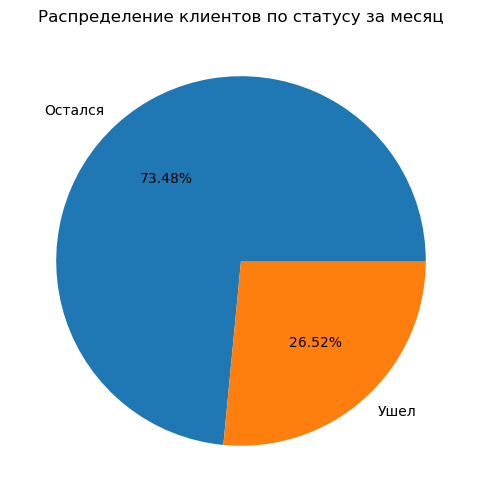

In [13]:
plt.figure(figsize=(10, 6))
plt.pie(churn_cnt['Процент_клиентов'], labels = churn_cnt['Статус_клиента'], autopct='%.2f%%')
plt.title('Распределение клиентов по статусу за месяц');

Мы видим, что более `26%` клиентов ушли из фитнес-центра за предыдущий месяц. Это довольно большое значение и мы действительно имеем проблему с оттоком клиентов.  
Исходя из баланса классов `26%` на `74%` мы имеем явный дисбаланс классов, поэтому далее при сравнении результатов алгоритмов машинного обучения, мы не сможем опираться на метрику `Accurancy`, а будем использовать только в качестве дополнительной информации.

**Смотрим на статистические характеристики данных**

In [14]:
stat = gym_churn.describe().T
stat

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Мы видим, что диапазоны значений признаков `avg_additional_charges_total`, `age` сильно отличаются от остальных.

**Смотрим на процент отклонения среднего от медианы в дискретных и непрерывных признаках**

In [15]:
stat['delta'] = 100*abs(stat['mean']-stat['50%'])/stat['50%']
stat_dc_features = round(stat.loc[continuous_features + discrete_features],2)
stat_dc_features

,count,mean,std,min,25%,50%,75%,max,delta
avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.87,136.22,210.95,552.59,7.87
avg_class_frequency_total,4000.0,1.88,0.97,0.00,1.18,1.83,2.54,6.02,2.52
avg_class_frequency_current_month,4000.0,1.77,1.05,0.00,0.96,1.72,2.51,6.15,2.76
contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00,368.13
age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00,0.64
month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00,332.28
lifetime,4000.0,3.72,3.75,0.00,1.00,3.00,5.00,31.00,24.16


Мы видим, что по следующим дискретным и непрерывным признакам есть отклонение медианного значения от среднего более чем на `5%`, что говорит о возможном наличие выбросов в данных:
- `avg_additional_charges_total`
- `contract_period`
- `month_to_end_contract`
- `lifetime`

**Смотрим на разницу средних значений ушедших и оставшихся клиентов**

In [16]:
mean_feature_group = gym_churn.groupby('churn').mean().round(2).T
mean_feature_group.columns = ['остались', 'ушли']
mean_feature_group['отличие_%'] = 100*abs(mean_feature_group['остались']-mean_feature_group['ушли'])/ \
                                mean_feature_group['остались']
mean_feature_group.round(2).sort_values(by='отличие_%', ascending=False)

,остались,ушли,отличие_%
lifetime,4.71,0.99,78.98
contract_period,5.75,1.73,69.91
month_to_end_contract,5.28,1.66,68.56
avg_class_frequency_current_month,2.03,1.04,48.77
promo_friends,0.35,0.18,48.57
group_visits,0.46,0.27,41.30
partner,0.53,0.36,32.08
avg_additional_charges_total,158.45,115.08,27.37
avg_class_frequency_total,2.02,1.47,27.23
near_location,0.87,0.77,11.49


Cравнивая средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался, видим что различия следующих признаков говорит о их влиянии на отток клиентов:

- `lifetime` - те кто ушли, посещали клуб около месяца в то время как те, кто остался, посещали клуб около `5` месяцев. Это может свидетельствовать о том, что клиенты покупали пробный абонемент на `1` мес и клуб им не понравился;
- `contract_period` - срок действия абонементов клентов, которые перестали посещать клуб, в среднем составлял меньше `2` месяцев, а абонементы тех, кто продолжает посещать клуб, покупалтсь в среднем почти на `6` мес, что говорит о положительном влиянии признака;
- `month_to_end_contract` - срок действия абонементов клиентов, бросивших клуб, истекал менее, чем через `2` месяца, а у тех, кто продолжает заниматься, остается в среднем более `5` месяцев до окончания срока действия абонемента, что говорит о положительном влиянии признака;
- `avg_class_frequency_current_month` - те, кто ушли, в среднем посещали клуб в предыдущем месяце всего `1` раз в неделю, а те, кто остался, посещали в `2` раза чаще, что говорит о положительном влиянии признака;
- `promo_friends` - среди тех, кто ушел, на `17%` меньше доля клиентов, пришедших в рамках акции «приведи друга», что говорит о положительном влиянии признака;
- `group_visits` - также среди тех, кто ушел, на `19%` меньше доля клиентов, посещающих групповые занятия, что говорит о положительном влиянии признака;
- `partner` - среди оставшихся на `17%` больше клиентов, которые пришли по программе компаний-партнёров клуба, что говорит о положительном влиянии признака;
- `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра на `43` руб больше у тех, кто остался в клубе, вероятно, их лояльность подкреплена тем, что клиенты довольны работой кафе/спорттоварами/косметическими или массажными салонами, что говорит о небольшом положительном влиянии признака;
- `avg_class_frequency_total` - те, кто ушли, в среднем посещали клуб за весь период действия их абонементов всего `1,5` раза в неделю, а те, кто остался, посещали `2` раза, что говорит о положительном влиянии признака;
- `near_location` - среди тех, кто ушел, на `10%` меньше доля клиентов, проживающих/раотающих поблизости от клуба, поэтому  отток больше у тех, кто живет дальше, что говорит о положительном влиянии признака;
- `age` - те, кто ушел из клуба, в среднем на `3` года моложе тех, кто остался, что говорит о совсем малом положительном влиянии признака;
- признаки `gender` (пол) и `phone` (наличие контактного телефона) никак не влияют на отток, так как средние одинаковы.

<a id="2.3"></a>
### 2.3 Гистограммы и распределения признаков
[Назад к содержанию](#0)

**Строим столбчатые гистограммы и распределения признаков**

Строим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток) для того чтобы сравнить пользователей визуально.

**Непрерывные признаки**

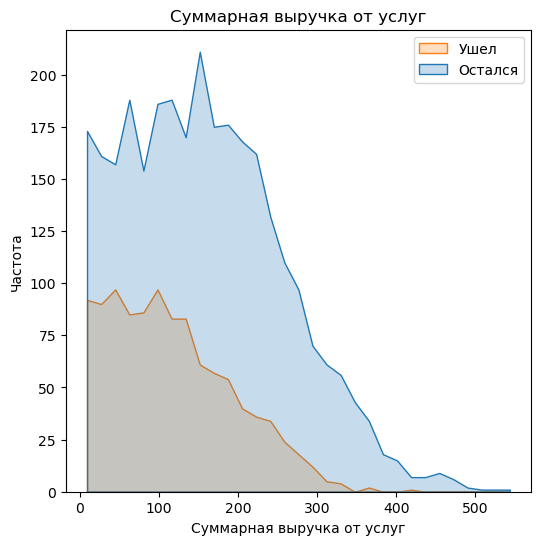

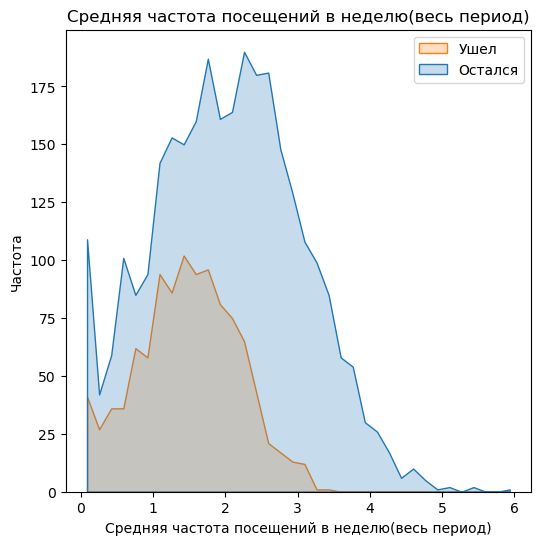

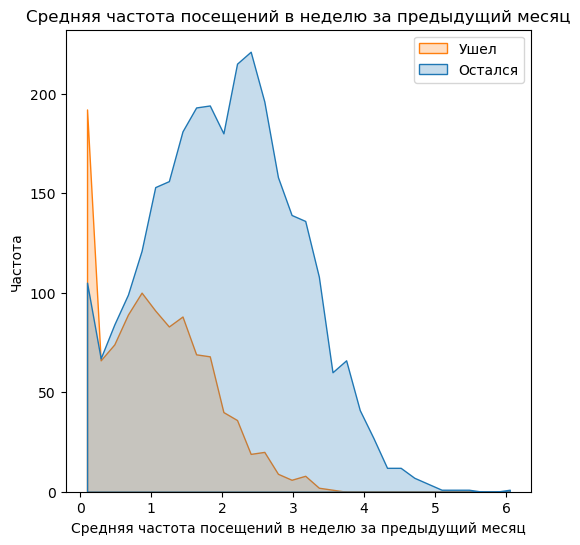

In [17]:
for i in range(0,len(continuous_features)):

    plt.figure(figsize=(6, 6))
    sns.histplot(data=gym_churn[[continuous_features[i], 'churn']], x=continuous_features[i], hue='churn', element='poly')

    plt.title(cf_names[i])
    plt.xlabel(cf_names[i])
    plt.ylabel('Частота')
    plt.legend(labels=['Ушел', 'Остался'])

    plt.show()

**Дискретные признаки**

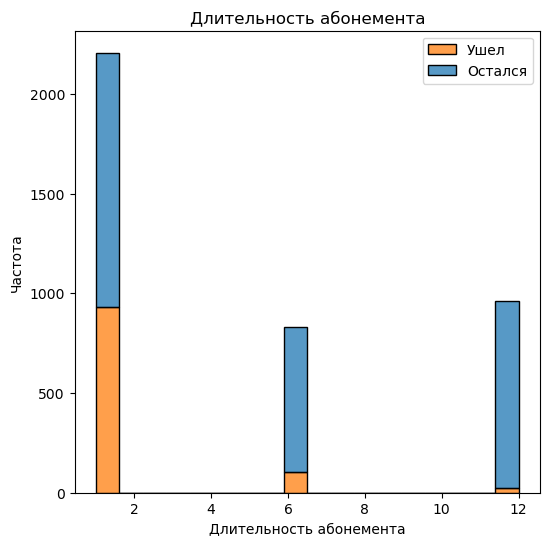

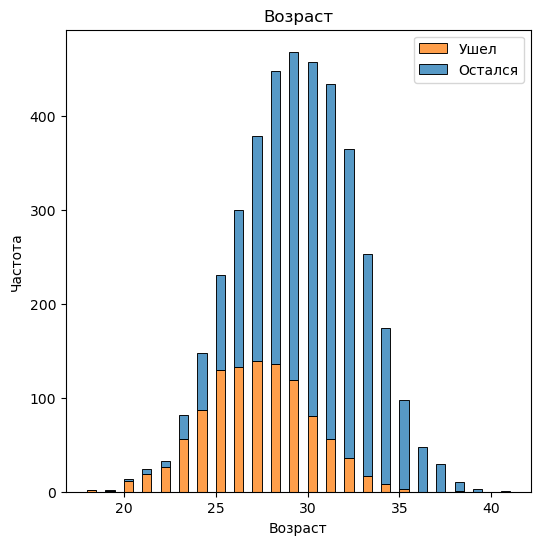

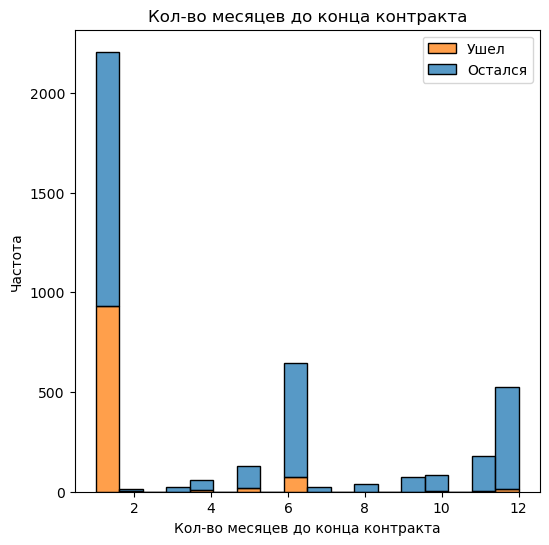

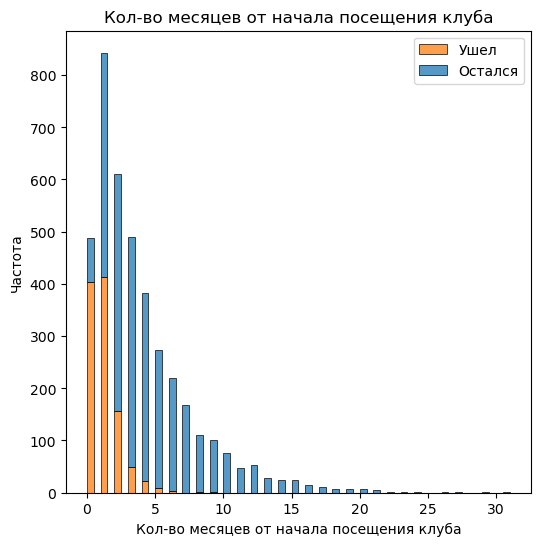

In [18]:
for i in range(0,len(discrete_features)):

    plt.figure(figsize=(6, 6))
    sns.histplot(data=gym_churn[[discrete_features[i], 'churn']], x=discrete_features[i], hue='churn', element='bars', 
                 multiple='stack')

    plt.title(df_names[i])
    plt.xlabel(df_names[i])
    plt.ylabel('Частота')
    plt.legend(labels=['Ушел', 'Остался'])

    plt.show()

**Булевы признаки**

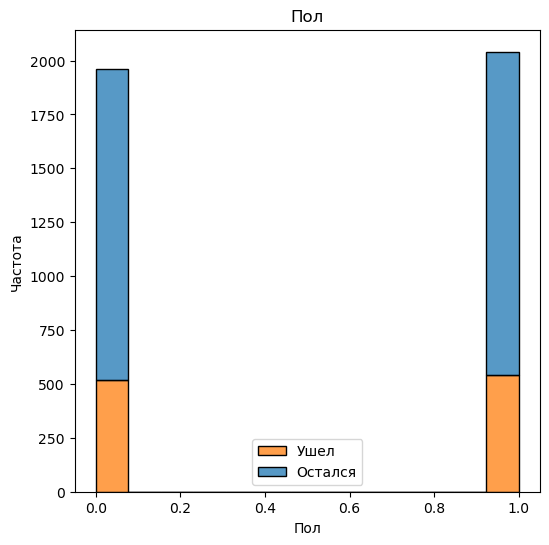

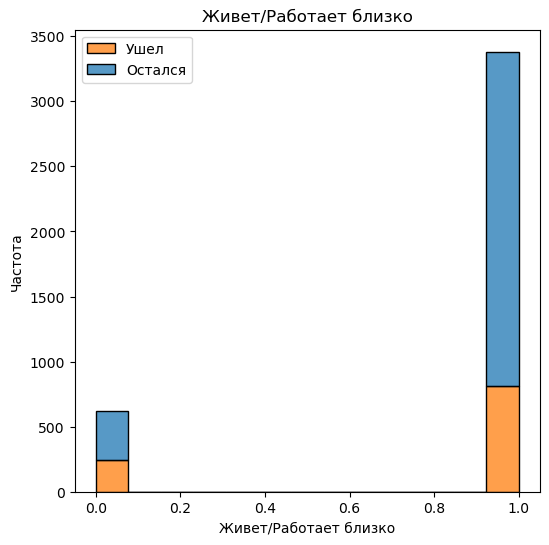

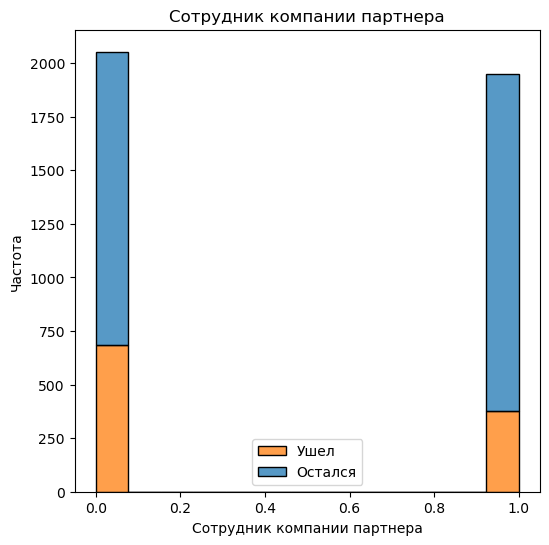

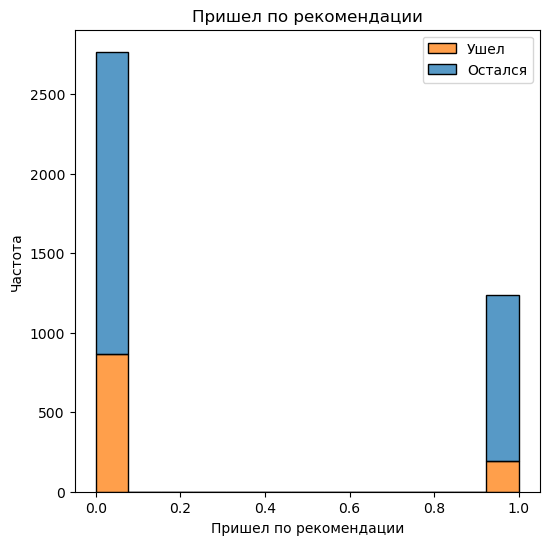

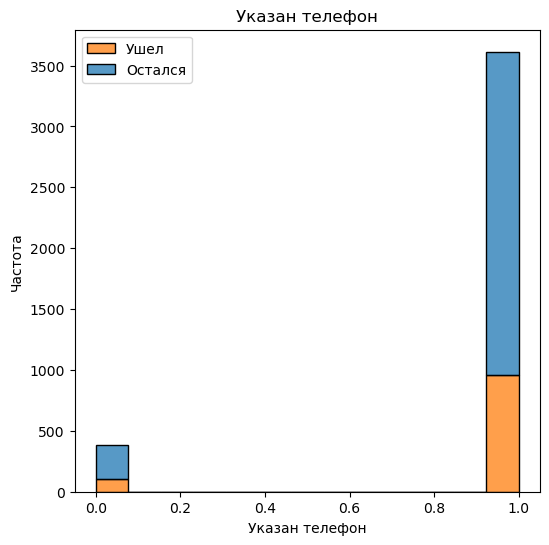

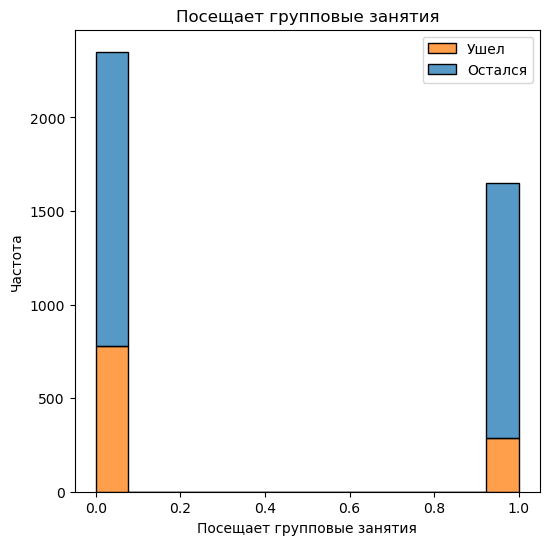

In [19]:
for i in range(0,len(boolean_features)):

    plt.figure(figsize=(6, 6))
    sns.histplot(data=gym_churn[[boolean_features[i], 'churn']], x=boolean_features[i], hue='churn', element='bars', 
                 multiple='stack')

    plt.title(bf_names[i])
    plt.xlabel(bf_names[i])
    plt.ylabel('Частота')
    plt.legend(labels=['Ушел', 'Остался'])

    plt.show()

Грфики подтверждают выводы, которые ранее были получены по сводной таблице средних значений.

<a id="2.4"></a>
### 2.4 Корреляция признаков
[Назад к содержанию](#0)

**Строим тепловую карту матрицы корреляций для признаков**

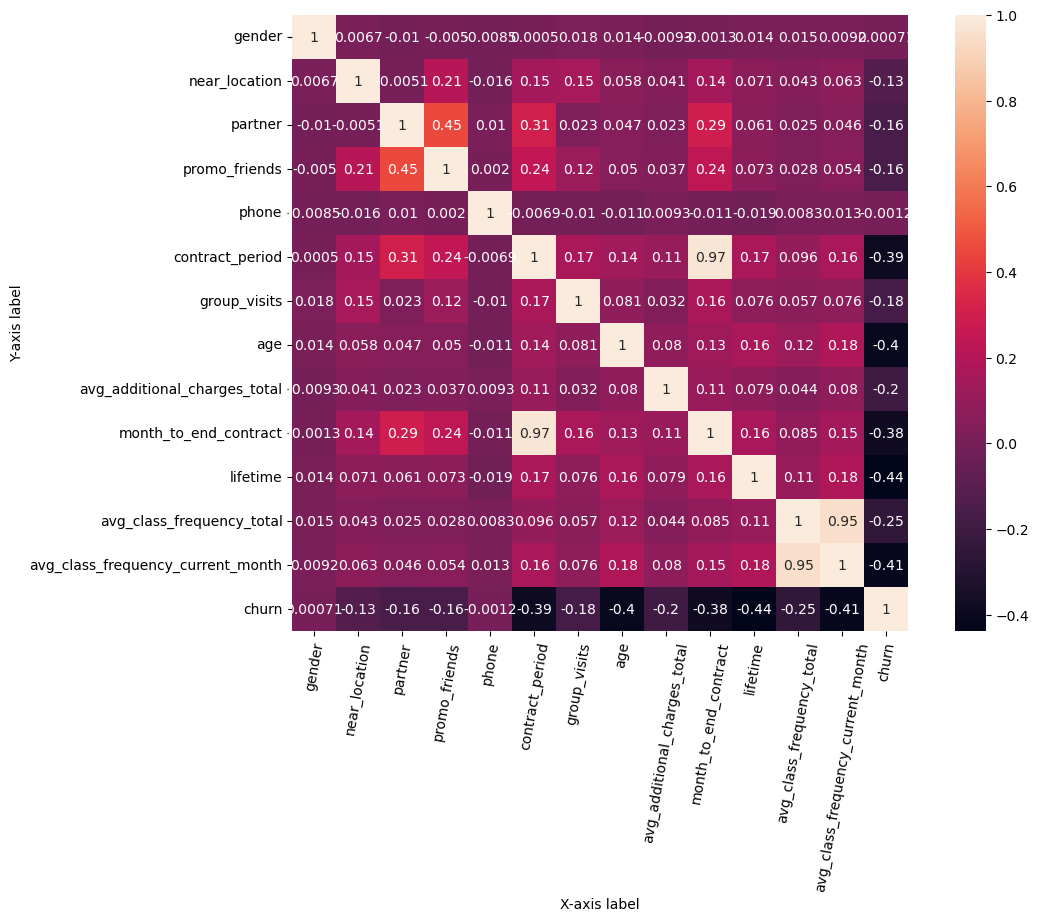

In [20]:
# Рисуем тепловую карту с подписями для матрицы корреляций
plt.figure(figsize=(12, 8))  # Задаем размер графика (ширина, высота) в дюймах
sns.heatmap(gym_churn.corr(), annot=True, square=True)

# Добавляем подписи к осям
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

# Поворачиваем подписи на 45 градусов по оси x
plt.xticks(rotation=80)

# Отображаем график
plt.show()

Мы видим, что
- есть сильная линейная корреляция между средней частотой посещений за период действия абоненмента `avg_class_frequency_total` и частотой посещений за последний месяц `avg_class_frequency_current_month`;
- есть сильная линейная корреляция между длительностью абоненмента `contract_period` и сроком его окончания `month_to_end_contract`;

Из-за наличия в данных значений признаков, которые имеют большой разброс перед обучением модели проведем стандартизацию.  
Из-за наличия 4 признаков, которые имеют сильную линейную корреляцию будем проводить регуляризации, при которой «занулятся» веса всех сильно скоррелированных признаков в парах, кроме одного.

**Смотрим на корреляцию непрерывных признаков между собой**

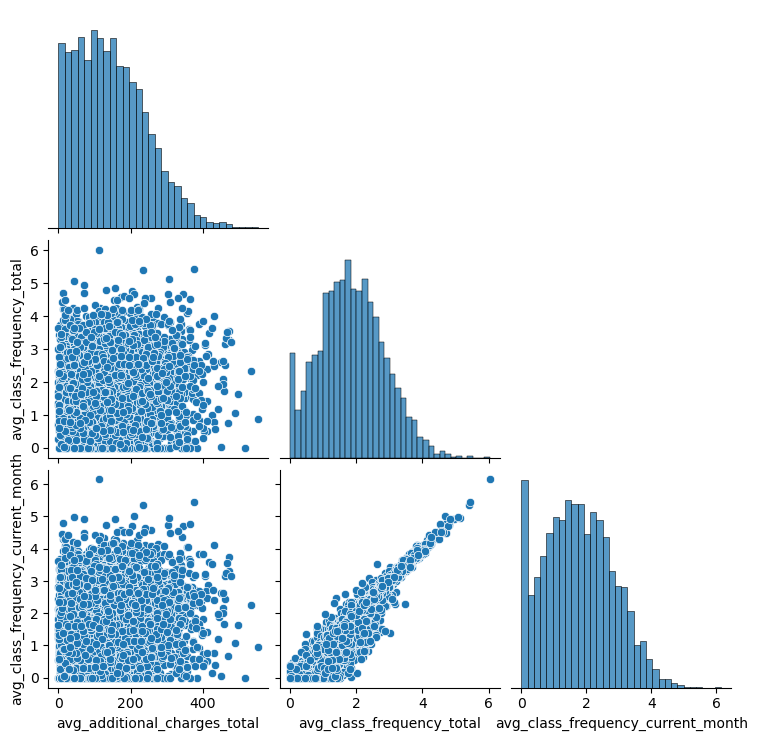

In [21]:
sns.pairplot(gym_churn[continuous_features], corner=True);

Мы видим, что
- есть сильная линейая корреляция между средней частотой посещений за период действия абоненмента `avg_class_frequency_total` и частотой посещений за последний месяц `avg_class_frequency_current_month`, которую мы видили на тепловой карте.

В итоге мы имеем 
- датафрейм состоящий из 14 столбцов и 4000 строк;
- у нас есть 13 признаков и одна целевая переменная `сhurn`;
- пропуски в данных отсутствуют;
- все типы данных корректные;
- все признаки уже имеют числовой вид;
- среди признаков есть три типа непрерывные, дискретные и булевы;
- у групп признаков средняя частота посещений за период действия абоненмента `avg_class_frequency_total` и частотой посещений за последний месяц `avg_class_frequency_current_month` и группа длительность абоненмента `contract_period` и срок его окончания `month_to_end_contract` наблюдается сильная линейная корреляция.

По данным получены следующие выводы:
- `lifetime` - те кто ушли, посещали клуб около месяца в то время как те, кто остался, посещали клуб около `5` месяцев. Это может свидетельствовать о том, что клиенты покупали пробный абонемент на `1` мес и клуб им не понравился;
- `contract_period` - срок действия абонементов клентов, которые перестали посещать клуб, в среднем составлял меньше `2` месяцев, а абонементы тех, кто продолжает посещать клуб, покупалтсь в среднем почти на `6` мес;
- `month_to_end_contract` - срок действия абонементов клиентов, бросивших клуб, истекал менее, чем через `2` месяца, а у тех, кто продолжает заниматься, остается в среднем более `5` месяцев до окончания срока действия абонемента;
- `avg_class_frequency_current_month` - те, кто ушли, в среднем посещали клуб в предыдущем месяце всего `1` раз в неделю, а те, кто остался, посещали в `2` раза чаще;
- `promo_friends` - среди тех, кто ушел, на `17%` меньше доля клиентов, пришедших в рамках акции «приведи друга»;
- `group_visits` - также среди тех, кто ушел, на `19%` меньше доля клиентов, посещающих групповые занятия;
- `partner` - среди оставшихся на `17%` больше клиентов, которые пришли по программе компаний-партнёров клуба;
- `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра на `43` руб больше у тех, кто остался в клубе, вероятно, их лояльность подкреплена тем, что клиенты довольны работой кафе/спорттоварами/косметическими или массажными салонами;
- `avg_class_frequency_total` - те, кто ушли, в среднем посещали клуб за весь период действия их абонементов всего `1,5` раза в неделю, а те, кто остался, посещали `2` раза;
- `near_location` - среди тех, кто ушел, на `10%` меньше доля клиентов, проживающих/раотающих поблизости от клуба;
- `age` - те, кто ушел из клуба, в среднем на `3` года моложе тех, кто остался;
- признаки `gender` (пол) и `phone` (наличие контактного телефона) никак не влияют на отток.

Проанализировав данные мы также видим, что:
- в наших данных есть мультиколлинеарность из-за наличия сильной линейной корреляции признаков, поэтому будем проводить регуляризацию признаков;
- значения признаков имеют большой разброс, поэтому необходимо проводить стандартизацию данных.

<a id="3"></a>
## 3 Построение модели прогнозирования оттока пользователей
[Назад к содержанию](#0)

Нам необходимо построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.  Прогноз оттока клиентов является задачей бинарной классификации - на основании признаков клиента мы будем относить его либо к тем, кто уйдёт из фитнес-центра через месяц, либо к тем, кто останется.  

Для решения этой задачи будем обучать модели обучения с учителем на основе:
- алгоритма логистической регрессии (LogisticRegression) с регулляризацией;
- алгоритма случайного леса (RandomForestClassifier)
- алгоритма градиентного бустинга (CatBoostClassifier).  

После обучения моделей и сравнения результатов будет выбрана лучшая модель.

<a id="3.1"></a>
### 3.1 Разделение данных на обучающую и валидационную выборку
[Назад к содержанию](#0)

In [22]:
# разделяем данные на признаки (матрица X) и целевую переменную (y):
X = gym_churn.drop('churn', axis = 1)
y = gym_churn['churn']

In [23]:
# разделяем модель на обучающую и валидационную выборку в соотношении 20%/80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<a id="3.2"></a>
### 3.2 Стандартизация данных
[Назад к содержанию](#0)

Из-за наличия в данных значений признаков, которые имеют большой разброс перед обучением модели проведем стандартизацию.  
Для стандартизации признаков воспользуемся моделью StandardScaler, обучим её на обучающей выборке признаков, а затем масштабируем значения признаков в обучающей и валидационной выборке.

In [24]:
# стандартизируем данные 
scaler = StandardScaler()
# обучаем scaler на обучающей выборке методом fit
scaler.fit(X_train)
# стандартизируем обучающую выборку методом transform scaler 
X_train_st =scaler.transform(X_train)
# стандартизируем тестовую выборку методом transform scaler
X_test_st = scaler.transform(X_test)

<a id="3.3"></a>
### 3.3 Обучение моделей
[Назад к содержанию](#0)

Для сравнения качества прогноза моделей будем использовать три метрики и матрицу ошибок для визуализации:
- **Матрица ошибок** — отображает количество верных прогнозов и количество неверных прогнозов. По матрице ошибок мы сможем оценить, есть ли у алгоритма перекос в сторону позитивного или негативного значения целевой перменной;
- **Accuracy** (доля правильных ответов) — доля верно угаданных ответов из всех прогнозов, чем ближе значение accuracy к 100%, тем лучше;
- **Precision** (точность) — доля правильных ответов модели в пределах класса, т.е. доля объектов действительно принадлежащих данному классу относительно всех объектов, которые система отнесла к этому классу;
- **Recall** (полнота) — доля истинно положительных классификаций, которая показывает, какую долю объектов, реально относящихся к положительному классу, предсказала верно.

Как писали ранее, из-за дисбаланса классов, метрика `Accurancy` будет информационной.

Объявляем функцию обучения моделей, которую будем использовать для разных моделей

In [25]:
def confusion_matrix_function(model, model_name):
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 4))
    sns.heatmap(cm, annot = True, fmt='.0f')
    plt.title(f'Матрица ошибок модели {model_name}')
    plt.xlabel('Прогноз модели')
    plt.ylabel('Истинное значение')
    plt.show()
    print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred), 2))
    print('Precision:', round(metrics.precision_score(y_test, y_pred), 2))
    print('Recall:', round(metrics.recall_score(y_test, y_pred), 2))

<a id="3.3.1"></a>
#### 3.3.1 Логистическая регрессия (LogisticRegression)
[Назад к содержанию](#0)

Обучение модели на основе логистической регрессии с L1 регуляризацией (penalty='l1'). Алгоритм L1 регуляризации «зануляет» веса при всех сильно скоррелированных признаках в парах, кроме одного. Параметр solver='liblinear' выбирает алгоритм оптимизации для обучения модели с L1 регуляризацией.
Мы используем регуляризацию, так как имеем 4 признака, которые имеют сильную линейную корреляцию

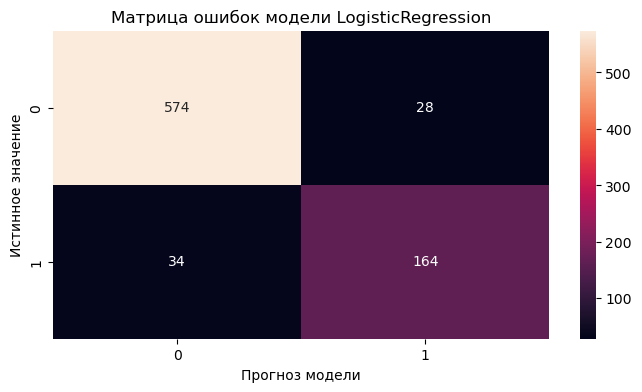

Accuracy: 0.92
Precision: 0.85
Recall: 0.83


In [26]:
confusion_matrix_function(LogisticRegression(penalty='l1', solver='liblinear', random_state=0), 'LogisticRegression')

Мы видим, что
- модель логистической регрессии верно определила `574` оставшихся клиента и `164` ушедшего клиента, но ошиблась для `28` клиентов, которые остались, и `34` ушедших клиентов;
- доля правильных ответов составила `0.92`;
- точность составила `0.85`;
- полнота составила `0.83`.

<a id="3.3.2"></a>
#### 3.3.2 Случайный лес (RandomForestClassifier)
[Назад к содержанию](#0)

Обучение модели на основе случайного леса RandomForestClassifier

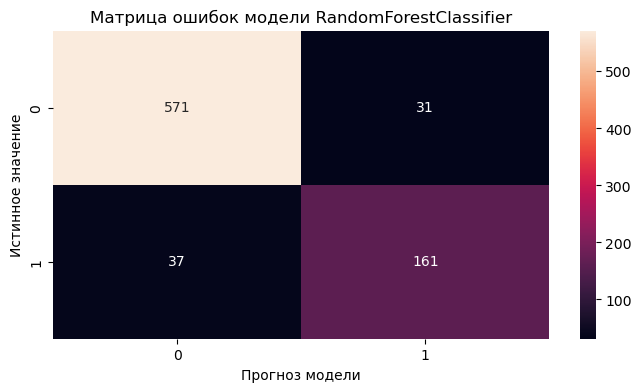

Accuracy: 0.92
Precision: 0.84
Recall: 0.81


In [27]:
confusion_matrix_function(RandomForestClassifier(random_state=0), 'RandomForestClassifier')

Мы видим, что
- модель случайного леса верно определила `571` оставшихся клиента и `161` ушедшего клиента, но ошиблась для `31` клиента, которые остались, и `37` ушедших клиентов;
- доля правильных ответов составила `0.92`;
- точность составила `0.84`;
- полнота составила `0.81`.

<a id="3.3.3"></a>
#### 3.3.3 Градиентный бустинг (CatBoostClassifier)
[Назад к содержанию](#0)

Обучение модели на основе градиентного бустинга CatBoostClassifier

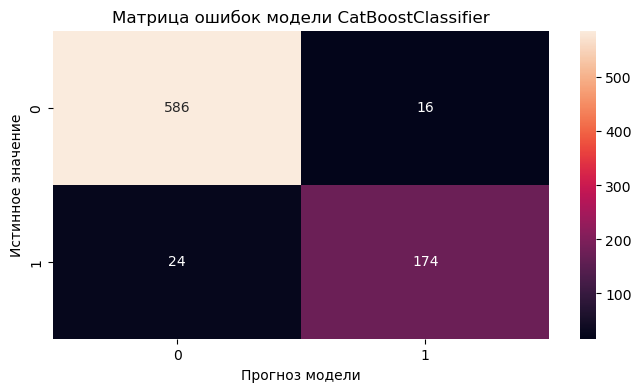

Accuracy: 0.95
Precision: 0.92
Recall: 0.88


In [28]:
confusion_matrix_function(CatBoostClassifier(logging_level='Silent', random_state=0), 'CatBoostClassifier')

Мы видим, что
- модель градиентного бустинга верно определила `586` оставшихся клиента и `174` ушедшего клиента, но ошиблась для `16` клиентов, которые остались, и `24` ушедших клиентов;
- доля правильных ответов составила `0.95`;
- точность составила `0.92`;
- полнота составила `0.88`.

В итоге мы получили что
- доля правильных ответов `Accuracy` у модели градиентного бустинга оказалась на `3%` выше и равна `0.95`;
- точность `Precision` у модели градиентного бустинга оказалась на `8%` выше и равна `0.92`;
- полнота `Recall` у модели градиентного бустинга оказалась на `7%` выше и равна `0.88`.  

Модель градиентного бустинга `CatBoostClassifier` показала себя лучше модели логистической регрессии `LogisticRegression` и модели случайного леса `RandomForestClassifier`, поэтому для прогноза оттока клиентов будем использовать модель градиентного бустинга `CatBoostClassifier`.

<a id="4"></a>
## 4 Кластеризация пользователей
[Назад к содержанию](#0)

Для того, чтобы провести маркетинговые активности, с целью снижения оттока клиентов, нам необходимо выделить группы клиентов группы клиентов и определить их ключевые особенности. Разделение клиентов на группы необходимо, чтобы для каждой группы выбрать стратегию взаимодействия, которая позволит удержать клиентов решивших покинуть клуб.  
При постановке задачи нас просили разбить клиентов не более чем на `5` групп, чтобы ограничить количество марктинговых компаний.

Проводить кластеризацию мы будем с помощью алгоритмов
- `Агломеративная иерархическая кластеризация` (не требует заранее заданного числа групп (кластеров));
- `K-Means` (требует заранее заданное число кластеров)

Сначала мы выполним кластеризацию с помощью алгоритма `Агломеративной иерархической кластеризации`, посмотрим на дендрограмму и  затем выберем нужное количество кластеров и проведем кластеризацию с помощью алгоритма `K-Means`.

<a id="4.1"></a>
### 4.1 Стандартизация данных
[Назад к содержанию](#0)

В наших данных признаки имеют большой разброс, поэтому для того, чтобы начать работу с алгоритмами необходимо провести стандартизацию для того чтобы все признаки привести к одному масштабу.

In [29]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

<a id="4.2"></a>
### 4.2 Агломеративная иерархическая кластеризация
[Назад к содержанию](#0)

Начнём с агломеративной иерархической кластеризации. В этом алгоритме модель по имеющимся признакам сама предложит количество кластеров и разделит по ним клиентов.  
Мы передадим модели `linkage()` все стандартизированные признаки клиентов и визуализируем получившиеся связи между клиентами в виде дендрограммы `dendrogram()`. Чтобы диаграмма получилась показательной параметру `method` передадим значение `ward`.

Передаем стандартизированную таблицу в качестве параметра функции linkage() и сохраненяем таблицу `«связок»` между объектами в переменной `linked` 

In [30]:
linked = linkage(X_sc, method = 'ward')

Визуализируем полученную таблицу `«связок»` как дендрограмму

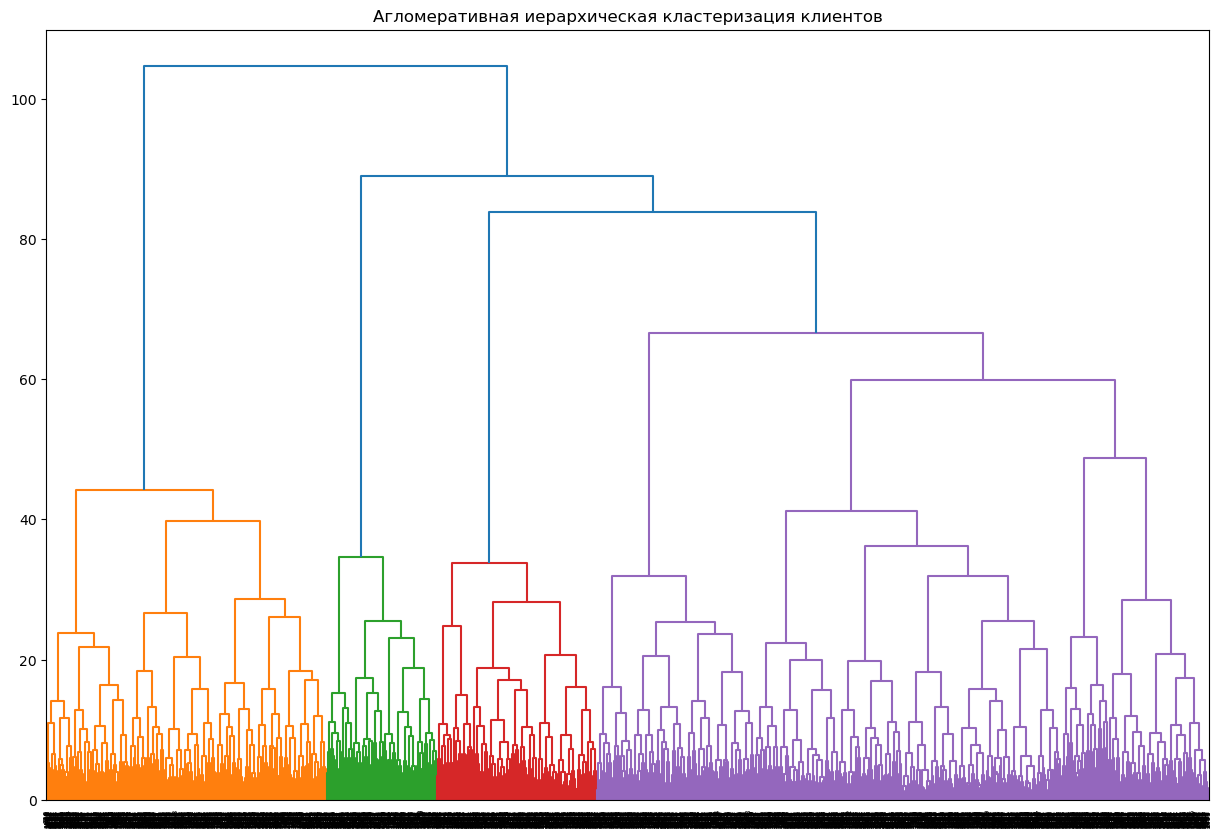

In [31]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Агломеративная иерархическая кластеризация клиентов')
plt.show()

Модель агломеративной иерархической кластеризации предложила оптимальное число кластеров `4`. На дендрограмме каждый кластер (группа клиентов) выделен цветом. В основании дендрограммы находятся все `4000` клиентов. Если двигаться по этому графику снизу (от клиентов) вверх, то клиенты будут объединяться сначала с другими наиболее похожими клиентами по парам или небольшим группам, затем группы будут объединяться между собой, пока не превратятся в одну, охватывающую всю выборку клиентов.

По получившейся дендрограмме можно визуально оценить группы клиентов. Модель предложила `4` кластера, но визульно клиентов разбить клиентов на `6` кластеров, но из-за требования ограничить максимальное количество компаний мы разобьём клиентов алгоритмом `K-Means` на `5` групп.

<a id="4.3"></a>
### 4.3 Алгоритм кластеризации `K-Means`
[Назад к содержанию](#0)

Воспользуемся алгоритмом K-Means и разделим клиентов на `5` кластеров определённых ранее. Создадим модель и применим её к стандартизированным признакам

In [32]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0)
# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(X_sc) 

Смотрим на результат

In [33]:
# создаем датафрем для сводной таблицы
cluster_clients = pd.DataFrame(labels, columns=['Кластер'])
cluster_clients['N'] = 1
cluster_cnt = cluster_clients \
            .pivot_table(index='Кластер', values=['N'], aggfunc='count') \
            .reset_index() \
            .sort_values(by='N', ascending=False)
cluster_cnt.columns = ['Кластер', 'Количество_клиентов']
cluster_cnt['Процент_клиентов'] = \
(100*cluster_cnt['Количество_клиентов']/cluster_cnt['Количество_клиентов'].sum()).round(2)
cluster_cnt

,Кластер,Количество_клиентов,Процент_клиентов
3,3,1262,31.55
0,0,1010,25.25
4,4,838,20.95
2,2,505,12.62
1,1,385,9.62


In [34]:
len(labels)

4000

Для каждого клиента мы получили номер кластера, которому он относится и теперь можем сравнить группы клиентов между собой.

<a id="4.4"></a>
### 4.4 Сводная таблица по группам клиентов
[Назад к содержанию](#0)

Строим сводную таблицу по группам клиентов. Предварительно добавим в наши данные группы каждого клиента

In [35]:
# Сохраним метки кластера в поле нашего датасета:
gym_churn['cluster'] = labels

In [36]:
# Посмотрим на средние значения признаков для кластеров:
gym_churn.groupby('cluster').mean().sort_values('churn', ascending=False).T.round(2)

cluster,3,2,1,4,0
gender,0.49,0.50,0.52,0.56,0.50
near_location,1.00,0.00,0.86,0.98,0.96
partner,0.35,0.46,0.47,0.36,0.78
promo_friends,0.24,0.08,0.31,0.23,0.57
phone,1.00,1.00,0.00,1.00,1.00
contract_period,1.95,2.35,4.79,2.67,10.89
group_visits,0.34,0.22,0.43,0.47,0.54
age,28.17,28.48,29.30,30.13,29.98
avg_additional_charges_total,131.62,135.46,143.96,161.66,160.76
month_to_end_contract,1.86,2.20,4.48,2.46,9.95


Считаем процент клиентов в проблемных кластерах

In [37]:
cluster_cnt.loc[[1,2,3]]['Процент_клиентов'].sum()

53.79

Мы видим, что группам `3`,`2`,`1` свойственен повышенный отток клиентов `51%`, `44%` и `27%` соответственно.  
Суммарно в проблемных кластерах более `53%` клиентов.

По сводной таблице мы видим, что для групп клиентов с высоким оттоком характерно
- проживание/работа не рядом с клубом `near_location`(есть значительное влияние на группу 2);
- покупка абонемента не по акции приведи друга `promo_friends`(есть значительное влияние на группу 2);
- отсутствие телефона `phone`(есть значительное влияние на группу 1);
- редкое посещение групповых занятий `group_visits`(есть влияние на группу 2 и 3);
- более редкие посещения, в среднем `1.5` посещения в неделю;
- меньшая выручка от покупки услуг клуба;
- покупка абонемента более молодыми клиентами, в среднем моложе на `1` или `2` года;
- покупка контрактов на более короткий период, чаще всего на `1` или `2` месяца.

<a id="4.5"></a>
### 4.5 Распределение признаков по кластерам
[Назад к содержанию](#0)

<a id="4.5.1"></a>
#### 4.5.1 Распределения непрерывных признаков
[Назад к содержанию](#0)

Для непрерывных признаков строим графики типа `boxplot`

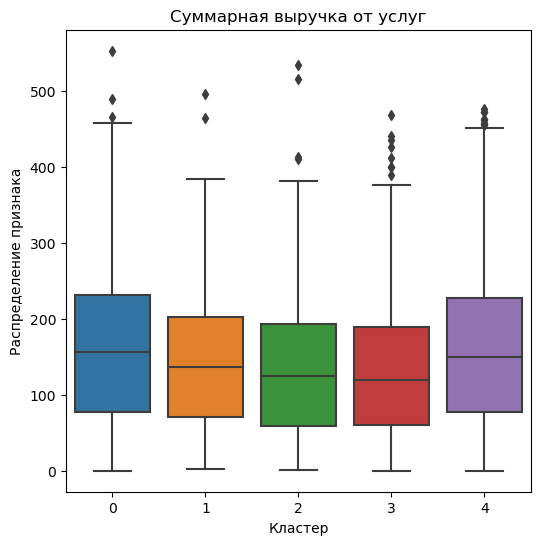

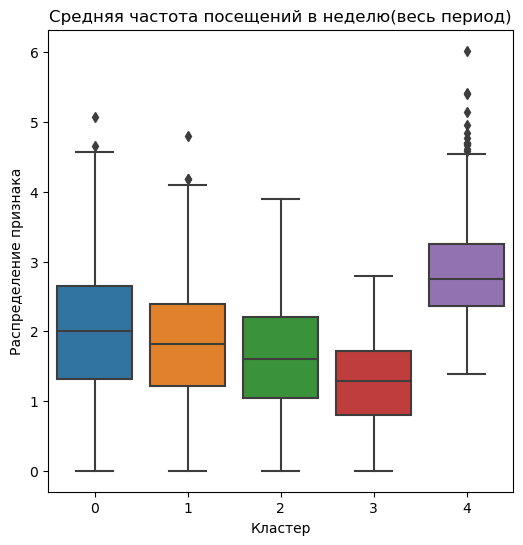

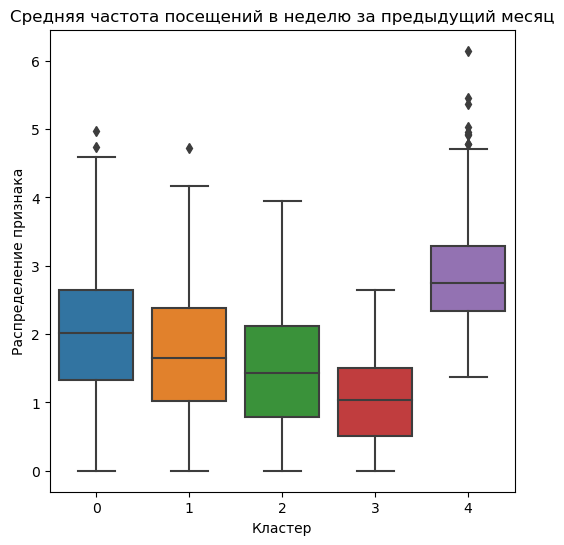

In [38]:
for i in range(0,len(continuous_features)):
    plt.figure(figsize=(6, 6))
    ax = sns.boxplot(data=gym_churn, x='cluster', y = gym_churn[continuous_features[i]])
    ax.set_title(cf_names[i])
    ax.set_ylabel('Распределение признака')
    ax.set_xlabel('Кластер')
    plt.show()

Графики распределения непрерывных признаков подтвердили ранее сформулированные выводы по средним значениям.

Для групп клиентов с высоким оттоком характерно
- более редкие посещения, в среднем `1.5` посещения в неделю;
- меньшая выручка от покупки услуг клуба.

<a id="4.5.2"></a>
#### 4.5.2 Распределения дискретных признаков
[Назад к содержанию](#0)

Для дискретных признаков строим графики типа `boxplot`

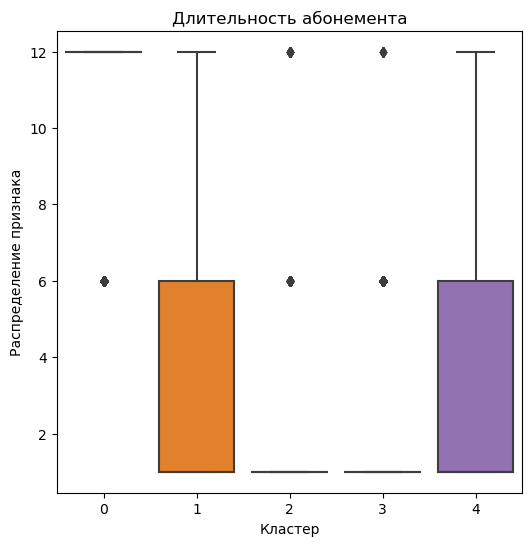

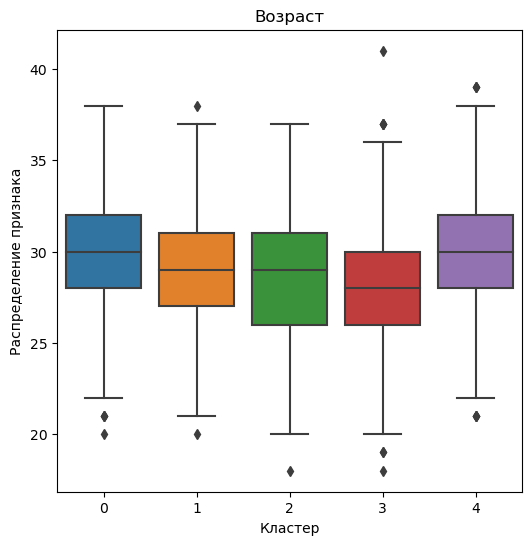

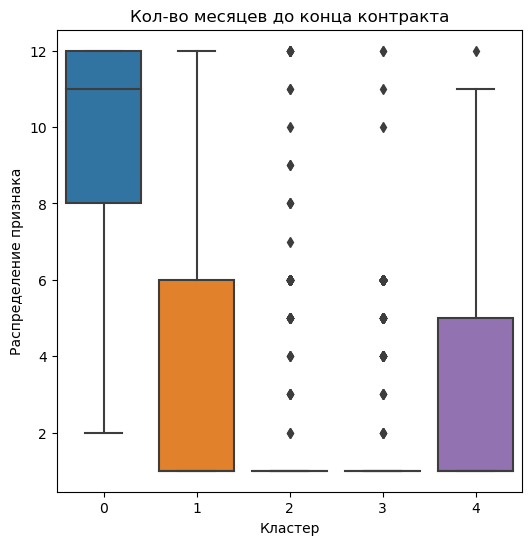

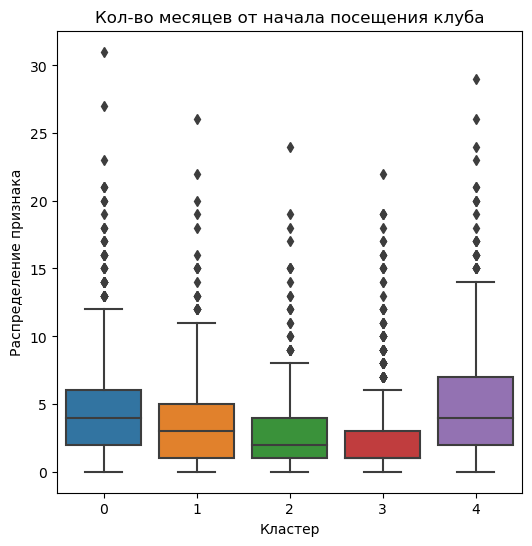

In [39]:
for i in range(0,len(discrete_features)):
    plt.figure(figsize=(6, 6))
    ax = sns.boxplot(data=gym_churn, x='cluster', y = gym_churn[discrete_features[i]])
    ax.set_title(df_names[i])
    ax.set_ylabel('Распределение признака')
    ax.set_xlabel('Кластер')    
    plt.show()

Графики для непрерывных переменных подтвердили ранее сформулированные выводы по средним значениям.

Для групп клиентов с высоким оттоком характерно
- покупка абонемента более молодыми клиентами, в среднем моложе на `1` или `2` года (возраст в диапазоне от `27` до `32` лет);
- покупка контрактов на более короткий период, чаще всего на `1` или `2` месяца.

<a id="4.5.3"></a>
#### 4.5.3 Распределения булевых признаков
[Назад к содержанию](#0)

Для булевых признаков строим графики типа `barplot`

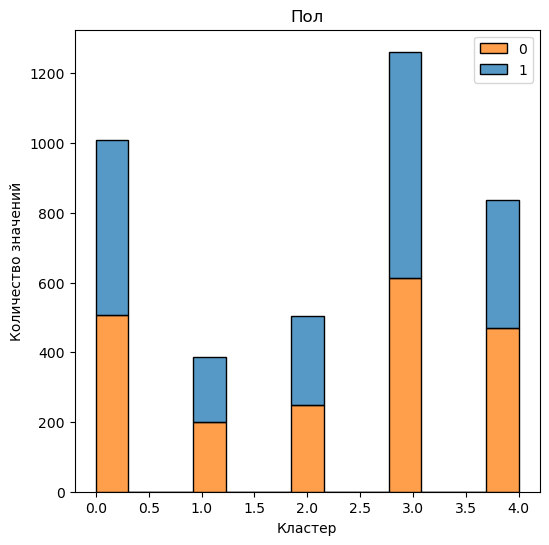

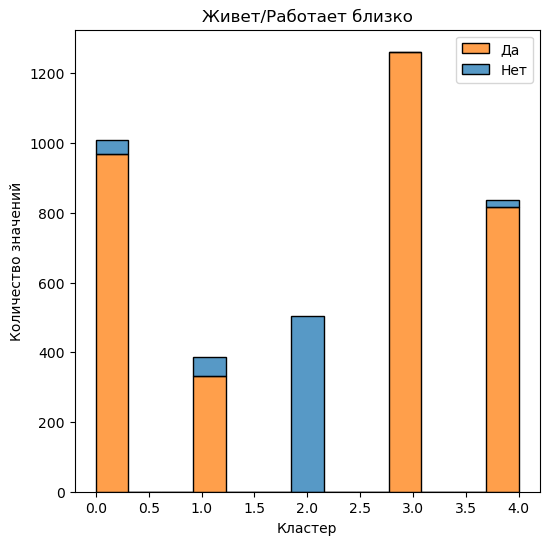

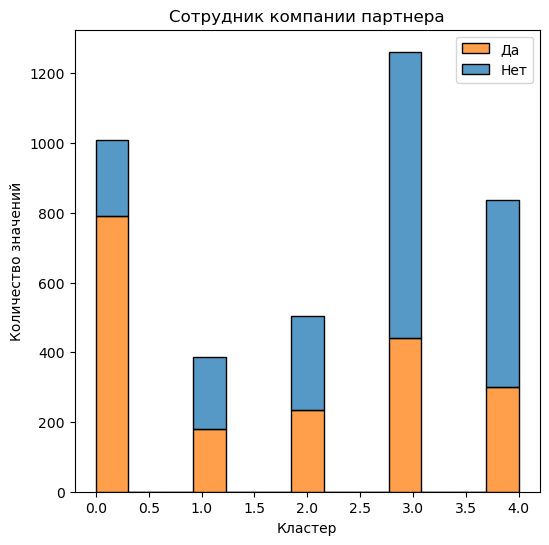

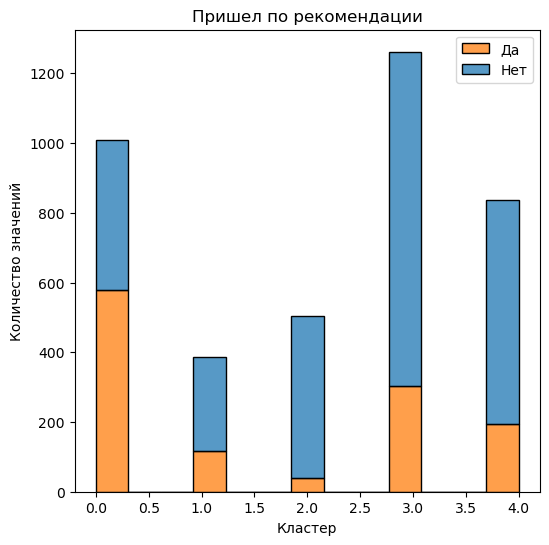

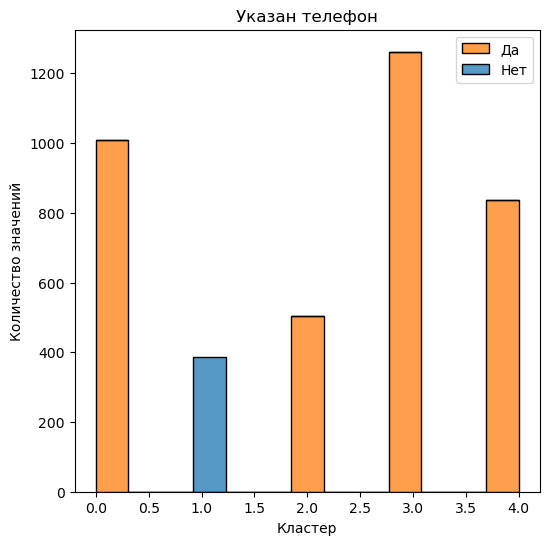

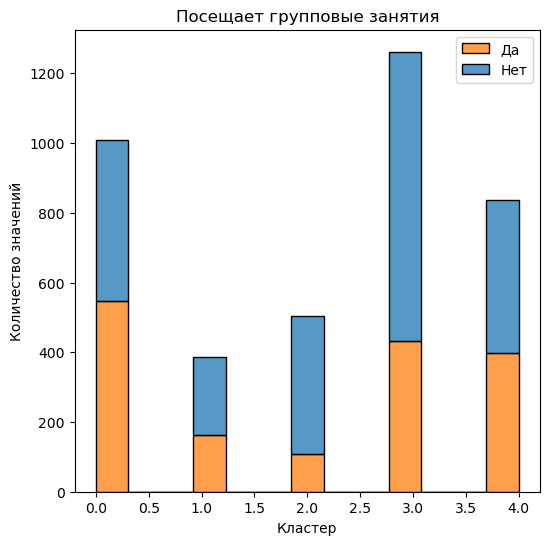

In [40]:
for i in range(0,len(boolean_features)):

    plt.figure(figsize=(6, 6))
    sns.histplot(data=gym_churn[[boolean_features[i], 'cluster', 'churn']], x='cluster', hue=boolean_features[i], element='bars', 
                 multiple='stack')

    plt.title(bf_names[i])
    plt.xlabel('Кластер')
    plt.ylabel('Количество значений')
    if bf_names[i]=='Пол':        
        plt.legend(labels=['0', '1'])
    else:
        plt.legend(labels=['Да', 'Нет'])
    plt.show()

Графики для булевых переменных подтвердили ранее сформулированные выводы по средним значениям.

Для групп клиентов с высоким оттоком характерно
- проживание/работа не рядом с клубом `near_location`(есть значительное влияние на группу 2);
- покупка абонемента не по акции приведи друга `promo_friends`(есть значительное влияние на группу 2);
- отсутствие телефона `phone`(есть значительное влияние на группу 1);
- редкое посещение групповых занятий `group_visits`(есть влияние на группу 2 и 3).

В итоге мы видим, что группам `3`,`2`,`1` свойственен повышенный отток клиентов `51%`, `44%` и `27%` соответственно.  
Суммарно в проблемных группах более `53%` клиентов.

Для групп клиентов с высоким оттоком характерно
- проживание/работа не рядом с клубом `near_location`(есть значительное влияние на группу 2);
- покупка абонемента не по акции приведи друга `promo_friends`(есть значительное влияние на группу 2);
- отсутствие телефона `phone`(есть значительное влияние на группу 1);
- редкое посещение групповых занятий `group_visits`(есть влияние на группу 2 и 3);
- более редкие посещения, в среднем `1.5` посещения в неделю;
- меньшая выручка от покупки услуг клуба;
- покупка абонемента более молодыми клиентами, в среднем моложе на `1` или `2` года;
- покупка контрактов на более короткий период, чаще всего на `1` или `2` месяца.

<a id="5"></a>
## 5 Выводы
[Назад к содержанию](#0)

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. В электронный вид переведны анкеты и данные контрактов пользователей.

Необходимо было провести анализ данных, разработать методику определения клиентов планирующих завершить пользоваться услугами фитнес-центра и подготовить рекомендации для стратегии взаимодействия с пользователями и их удержания.

**После предварительного анализа данных мы увидели что**
- датафрейм состоящий из 14 столбцов и 4000 строк;
- у нас есть 13 признаков и одна целевая переменная `сhurn`;
- пропуски в данных отсутствуют;
- все типы данных корректные;
- все признаки уже имеют числовой вид;
- среди признаков есть три типа непрерывные, дискретные и булевы;
- у групп признаков средняя частота посещений за период действия абоненмента `avg_class_frequency_total` и частотой посещений за последний месяц `avg_class_frequency_current_month` и группа длительность абоненмента `contract_period` и срок его окончания `month_to_end_contract` наблюдается сильная линейная корреляция.

Мы увидели, что более `26%` клиентов ушли из фитнес-центра за предыдущий месяц, что довольно много и мы действительно имеем проблему с оттоком клиентов.

Из-за наличия в наших данных мультиколлинеарности (наличие сильной линейной корреляции признаков) мы провели регуляризацию признаков, а из-за большого разброса значений признаков выполнили стандартизацию данных перед обучением моделей.

**После проведенного анализа мы пришли к выводам:**
- `lifetime` - те кто ушли, посещали клуб около месяца в то время как те, кто остался, посещали клуб около `5` месяцев. Это может свидетельствовать о том, что клиенты покупали пробный абонемент на `1` мес и клуб им не понравился;
- `contract_period` - срок действия абонементов клентов, которые перестали посещать клуб, в среднем составлял меньше `2` месяцев, а абонементы тех, кто продолжает посещать клуб, покупалтсь в среднем почти на `6` мес, что говорит о положительном влиянии признака;
- `month_to_end_contract` - срок действия абонементов клиентов, бросивших клуб, истекал менее, чем через `2` месяца, а у тех, кто продолжает заниматься, остается в среднем более `5` месяцев до окончания срока действия абонемента, что говорит о положительном влиянии признака;
- `avg_class_frequency_current_month` - те, кто ушли, в среднем посещали клуб в предыдущем месяце всего `1` раз в неделю, а те, кто остался, посещали в `2` раза чаще, что говорит о положительном влиянии признака;
- `promo_friends` - среди тех, кто ушел, на `17%` меньше доля клиентов, пришедших в рамках акции «приведи друга», что говорит о положительном влиянии признака;
- `group_visits` - также среди тех, кто ушел, на `19%` меньше доля клиентов, посещающих групповые занятия, что говорит о положительном влиянии признака;
- `partner` - среди оставшихся на `17%` больше клиентов, которые пришли по программе компаний-партнёров клуба, что говорит о положительном влиянии признака;
- `avg_additional_charges_total` - суммарная выручка от других услуг фитнес-центра на `43` руб больше у тех, кто остался в клубе, вероятно, их лояльность подкреплена тем, что клиенты довольны работой кафе/спорттоварами/косметическими или массажными салонами, что говорит о небольшом положительном влиянии признака;
- `avg_class_frequency_total` - те, кто ушли, в среднем посещали клуб за весь период действия их абонементов всего `1,5` раза в неделю, а те, кто остался, посещали `2` раза, что говорит о положительном влиянии признака;
- `near_location` - среди тех, кто ушел, на `10%` меньше доля клиентов, проживающих/раотающих поблизости от клуба, поэтому  отток больше у тех, кто живет дальше, что говорит о положительном влиянии признака;
- `age` - те, кто ушел из клуба, в среднем на `3` года моложе тех, кто остался, что говорит о совсем малом положительном влиянии признака;
- признаки `gender` (пол) и `phone` (наличие контактного телефона) никак не влияют на отток, так как средние одинаковы.

Исходя из баланса классов `26%` на `74%` мы имеем явный дисбаланс классов, поэтому далее при сравнении результатов алгоритмов машинного обучения, мы не опираемся на метрику `Accurancy`, а используем только в качестве дополнительной информации.

**После обучения моделей мы получили следующие результаты:**  
`Логистическая регрессия (LogisticRegression)`  
Accuracy: 0.92  
Precision: 0.85  
Recall: 0.83  

`Случайный лес (RandomForestClassifier)`  
Accuracy: 0.92  
Precision: 0.84  
Recall: 0.81  

`Градиентный бустинг (CatBoostClassifier)`  
Accuracy: 0.95  
Precision: 0.92  
Recall: 0.88  

Для прогноза оттока клиентов предлагается использовать модель градиентного бустинга `CatBoostClassifier`, так как она показала себя лучше модели логистической регрессии `LogisticRegression` и модели случайного леса `RandomForestClassifier`:
- доля правильных ответов `Accuracy` у модели градиентного бустинга оказалась на `3%` выше и равна `0.95`;
- точность `Precision` у модели градиентного бустинга оказалась на `8%` выше и равна `0.92`;
- полнота `Recall` у модели градиентного бустинга оказалась на `7%` выше и равна `0.88`.  

С помощью агломеративной иерархической кластеризации мы подобрали оптимальное количество кластеров равное `5` и разделили клиентов по `5` группам с помощью алгоритма кластеризации `K-Means`.

В итоге мы видим, что группам `3`,`2`,`1` свойственен повышенный отток клиентов `51%`, `44%` и `27%` соответственно.  
Суммарно в проблемных группах более `53%` клиентов.

**Для групп клиентов с высоким оттоком характерно**
- проживание/работа не рядом с клубом `near_location`(есть значительное влияние на группу 2);
- покупка абонемента не по акции приведи друга `promo_friends`(есть значительное влияние на группу 2);
- отсутствие телефона `phone`(есть значительное влияние на группу 1);
- редкое посещение групповых занятий `group_visits`(есть влияние на группу 2 и 3);
- более редкие посещения, в среднем `1.5` посещения в неделю;
- меньшая выручка от покупки услуг клуба;
- покупка абонемента более молодыми клиентами, в среднем моложе на `1` или `2` года;
- покупка контрактов на более короткий период, чаще всего на `1` или `2` месяца.

Для снижения оттока клиентов необходимо проводить ежемесячное выявление клиентов склонных к уходу и их кластеризацию, для проведения маркетинговых акций на каждую группу клиентов отдельно. После проведения маркетинговых акций необходим сбор и анализ данных по клиентам получившим персональные предложения. 

**Основные признаки влияющие на отток клиентов и рекомендации при их выявлении:**
- редкое посещение тренировок и групповых занятий;
    - стимулирование начислением бонусов и бесплатными занятиями;
- покупка короткого контракта;
    - предлагать дополнительную скидку при увеличении срока следующего контракта;
- не посещение групповых занятий;
    - предлагать бесплатные групповые занятия;
- приход не по акции `приведи друга`
    - предлагать дополнительные бонусы и скидки при наличии активных контрактов друзей пришедших по акции.

**Для снижение оттока клиентов можно выбрать следующие маркетинговые активности и предлагать их всем клиентам:**
- развивать систему привлечения клиентов по акции `приведи друга` начисляя клиентам бонусы за привлечение друзей;
- предлагать клиентам бонусы за заполнение профиля, посещение тренировок, групповых занятий и занятий с инструктором и покупку других платных услуг (размер бонусов должен увеличиваться в зависимости от стоимости услуги), которые он может потратить в клубе получив скидку на платные услуги;
- при истечении срока контракта, особенно краткосрочного, предлагать продлении контракта на более длительный срок со скидкой;
- предлагать клиенту разовые консультации с инструктором для корректировки программы составленной в начале, что позволит заинтересовать клинтов в достижении поставленных целей;
- реализовать в личном кабинете раздел где клиент сможет отслеживать свои активности, достижение и полученные бонусы.